In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#importing the data
df= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Problem1_data.xlsx')
df.head()


In [ ]:
df.shape

(110, 1)

In [ ]:
df.isnull().sum()

E-Mails    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 109
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   E-Mails  110 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [ ]:
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.probability import FreqDist

###Data Cleaning

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(('thank','respected','sir','regards','dear','due','able','get','thanks','hello','madam','got','know','hi','please','kindly','course','session','help', 'already', 'also','could','getting', 'give','hence', 'hope','pls', 'plz','regardshi','really','see','th','thanking', 'today','would', 'yesterday','want','wanted'))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = "".join([word for word in text if not word.isdigit()])
    tokens = re.split('\W+', text)
    text = [lemmatizer.lemmatize(word) for word in tokens if word not in stopword]
    return text

In [ ]:
list_of_words = clean_text(df['E-Mails'])

###Count Of Words


In [ ]:
print("length of the list of words", len(list_of_words))
print(list_of_words)

length of the list of words 1468
['applied', 'professional', 'submitted', 'document', 'review', 'application', 'login', 'detail', 'youhi', 'unable', 'change', 'password', 'error', 'message', 'screenshot', 'check', 'team', 'enrolled', 'finish', 'october', 'emergency', 'required', 'attention', 'still', 'complete', 'finish', 'session', 'found', 'session', 'immensely', 'helpful', 'therefore', 'requesting', 'possible', 'extend', 'duration', 'week', 'best', 'login', 'thankshi', 'complete', 'program', 'deadline', 'extend', 'deadline', 'hey', 'unable', 'set', 'one', 'time', 'password', 'error', 'facing', 'request', 'assistance', 'hii', 'suddenly', 'playing', 'error', 'showing', 'screen', 'allowing', 'go', 'tab', 'open', 'phone', 'screenshot', 'attached', 'facing', 'login', 'issue', 'received', 'separate', 'mail', 'comprises', 'password', 'access', 'hereby', 'attached', 'document', 'planning', 'register', 'programme', 'need', 'clarification', 'one', 'point', 'completion', 'online', 'day', 'whet

In [ ]:
b=ngrams(list_of_words,2)
fdist=FreqDist(b)
fdist.most_common()

[(('set', 'password'), 7),
 (('unable', 'login'), 5),
 (('soon', 'possible'), 5),
 (('watch', 'video'), 5),
 (('error', 'message'), 4),
 (('login', 'error'), 4),
 (('login', 'detail'), 3),
 (('unable', 'set'), 3),
 (('token', 'expired'), 3),
 (('online', 'program'), 3),
 (('hindi', 'language'), 3),
 (('one', 'week'), 3),
 (('login', 'account'), 3),
 (('one', 'month'), 3),
 (('id', 'password'), 3),
 (('reset', 'link'), 3),
 (('video', 'one'), 3),
 (('extending', 'week'), 3),
 (('password', 'error'), 2),
 (('team', 'enrolled'), 2),
 (('issue', 'received'), 2),
 (('password', 'access'), 2),
 (('online', 'day'), 2),
 (('back', 'button'), 2),
 (('many', 'time'), 2),
 (('issue', 'soon'), 2),
 (('online', 'class'), 2),
 (('submitted', 'fee'), 2),
 (('information', 'regarding'), 2),
 (('status', 'application'), 2),
 (('password', 'log'), 2),
 (('log', 'start'), 2),
 (('two', 'day'), 2),
 (('extend', 'time'), 2),
 (('language', 'english'), 2),
 (('request', 'send'), 2),
 (('send', 'link'), 2),


In [ ]:
counts = dict()
for word in list_of_words:
  counts[word] = counts.get(word, 0) + 1
print(counts)

{'applied': 3, 'professional': 4, 'submitted': 5, 'document': 2, 'review': 3, 'application': 6, 'login': 32, 'detail': 12, 'youhi': 2, 'unable': 16, 'change': 5, 'password': 25, 'error': 17, 'message': 7, 'screenshot': 6, 'check': 4, 'team': 13, 'enrolled': 6, 'finish': 3, 'october': 1, 'emergency': 2, 'required': 1, 'attention': 1, 'still': 7, 'complete': 15, 'session': 11, 'found': 2, 'immensely': 1, 'helpful': 2, 'therefore': 2, 'requesting': 1, 'possible': 9, 'extend': 8, 'duration': 3, 'week': 14, 'best': 6, 'thankshi': 2, 'program': 19, 'deadline': 3, 'hey': 1, 'set': 9, 'one': 14, 'time': 24, 'facing': 3, 'request': 15, 'assistance': 1, 'hii': 3, 'suddenly': 3, 'playing': 2, 'showing': 3, 'screen': 2, 'allowing': 1, 'go': 2, 'tab': 1, 'open': 5, 'phone': 4, 'attached': 5, 'issue': 12, 'received': 11, 'separate': 1, 'mail': 8, 'comprises': 1, 'access': 9, 'hereby': 2, 'planning': 1, 'register': 3, 'programme': 1, 'need': 7, 'clarification': 1, 'point': 1, 'completion': 3, 'online

In [ ]:
sorted_counts = sorted(counts.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
print(sorted_counts)

[('login', 32), ('password', 25), ('time', 24), ('program', 19), ('video', 17), ('online', 17), ('error', 17), ('unable', 16), ('request', 15), ('day', 15), ('complete', 15), ('week', 14), ('registered', 14), ('one', 14), ('link', 14), ('team', 13), ('class', 13), ('issue', 12), ('email', 12), ('detail', 12), ('session', 11), ('received', 11), ('language', 10), ('expired', 10), ('course', 10), ('completed', 10), ('watch', 9), ('tried', 9), ('set', 9), ('possible', 9), ('account', 9), ('access', 9), ('send', 8), ('registration', 8), ('page', 8), ('mail', 8), ('id', 8), ('extend', 8), ('still', 7), ('regarding', 7), ('need', 7), ('message', 7), ('english', 7), ('screenshot', 6), ('problem', 6), ('let', 6), ('last', 6), ('enrolled', 6), ('best', 6), ('application', 6), ('work', 5), ('use', 5), ('take', 5), ('submitted', 5), ('soon', 5), ('reset', 5), ('payment', 5), ('open', 5), ('name', 5), ('log', 5), ('guide', 5), ('free', 5), ('done', 5), ('change', 5), ('available', 5), ('attached', 

In [ ]:
words = list()
for w in sorted_counts:
  words.append(w[0])
print(words)

['login', 'password', 'time', 'program', 'video', 'online', 'error', 'unable', 'request', 'day', 'complete', 'week', 'registered', 'one', 'link', 'team', 'class', 'issue', 'email', 'detail', 'session', 'received', 'language', 'expired', 'course', 'completed', 'watch', 'tried', 'set', 'possible', 'account', 'access', 'send', 'registration', 'page', 'mail', 'id', 'extend', 'still', 'regarding', 'need', 'message', 'english', 'screenshot', 'problem', 'let', 'last', 'enrolled', 'best', 'application', 'work', 'use', 'take', 'submitted', 'soon', 'reset', 'payment', 'open', 'name', 'log', 'guide', 'free', 'done', 'change', 'available', 'attached', 'weekend', 'support', 'start', 'reply', 'refund', 'professional', 'phone', 'number', 'next', 'new', 'network', 'month', 'looking', 'information', 'find', 'fee', 'confirm', 'check', 'back', 'way', 'watching', 'watched', 'two', 'trying', 'token', 'suddenly', 'since', 'showing', 'schedule', 'say', 'review', 'register', 'regardsi', 'regardshello', 'recei

In [ ]:
top_100_words = words[0:110]
print(top_100_words)

['login', 'password', 'time', 'program', 'video', 'online', 'error', 'unable', 'request', 'day', 'complete', 'week', 'registered', 'one', 'link', 'team', 'class', 'issue', 'email', 'detail', 'session', 'received', 'language', 'expired', 'course', 'completed', 'watch', 'tried', 'set', 'possible', 'account', 'access', 'send', 'registration', 'page', 'mail', 'id', 'extend', 'still', 'regarding', 'need', 'message', 'english', 'screenshot', 'problem', 'let', 'last', 'enrolled', 'best', 'application', 'work', 'use', 'take', 'submitted', 'soon', 'reset', 'payment', 'open', 'name', 'log', 'guide', 'free', 'done', 'change', 'available', 'attached', 'weekend', 'support', 'start', 'reply', 'refund', 'professional', 'phone', 'number', 'next', 'new', 'network', 'month', 'looking', 'information', 'find', 'fee', 'confirm', 'check', 'back', 'way', 'watching', 'watched', 'two', 'trying', 'token', 'suddenly', 'since', 'showing', 'schedule', 'say', 'review', 'register', 'regardsi', 'regardshello', 'recei

In [ ]:
comment_words = '' 
comment_words += " ".join(top_100_words)+" "
print(comment_words)

login password time program video online error unable request day complete week registered one link team class issue email detail session received language expired course completed watch tried set possible account access send registration page mail id extend still regarding need message english screenshot problem let last enrolled best application work use take submitted soon reset payment open name log guide free done change available attached weekend support start reply refund professional phone number next new network month looking information find fee confirm check back way watching watched two trying token suddenly since showing schedule say review register regardsi regardshello receipt per participation paid oblige needful mobile made like kind 


###Wordcloud

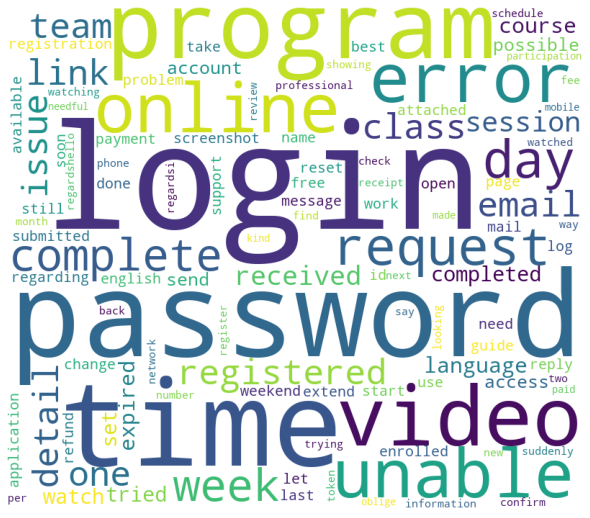

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
wordcloud = WordCloud(width = 800, height = 700, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


###Categorize Types of Cases

In [ ]:
df['category'] = df['E-Mails'].apply(lambda x:'Login' if re.search("Password|login",x)else x)

In [ ]:
df['category'] = df['E-Mails'].apply(lambda x:'Deadline' if re.search("expired|week",x)else x)

In [ ]:
df['category'] = df['E-Mails'].apply(lambda x:'Program' if re.search("video|online",x)else x)

In [ ]:
df["category"].fillna('Others', inplace = True)

In [ ]:
df['category'].value_counts()

Login        35
Program      27
others       26
Deadline     22
Name: category, dtype: int64

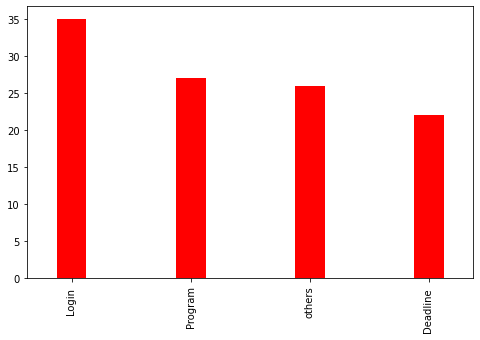

In [ ]:
df['category'].value_counts().plot.bar(figsize=(8,5),width=0.25, color='r');

###Word Embedding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [ ]:
X_tfidf = tfidf_vect.fit_transform(top_100_words)

In [ ]:
print(X_tfidf.shape)
#feature names
print(tfidf_vect.get_feature_names())

(110, 108)
['access', 'account', 'application', 'attached', 'available', 'back', 'best', 'change', 'check', 'class', 'complete', 'completed', 'confirm', 'day', 'detail', 'done', 'email', 'english', 'enrolled', 'error', 'expired', 'extend', 'fee', 'find', 'free', 'guide', 'id', 'information', 'issue', 'kind', 'language', 'last', 'let', 'like', 'link', 'log', 'login', 'looking', 'made', 'mail', 'message', 'mobile', 'month', 'name', 'need', 'needful', 'network', 'new', 'next', 'number', 'oblige', 'one', 'online', 'open', 'page', 'paid', 'participation', 'password', 'payment', 'per', 'phone', 'possible', 'problem', 'professional', 'program', 'receipt', 'received', 'refund', 'regarding', 'regardshello', 'regardsi', 'register', 'registered', 'registration', 'reply', 'request', 'reset', 'review', 'say', 'schedule', 'screenshot', 'send', 'set', 'showing', 'since', 'soon', 'start', 'still', 'submitted', 'suddenly', 'support', 'take', 'team', 'time', 'token', 'tried', 'trying', 'two', 'unable', 

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()

X_tfidf_df.head()

,access,account,application,attached,available,back,best,change,check,class,complete,completed,confirm,day,detail,done,email,english,enrolled,error,expired,extend,fee,find,free,guide,id,information,issue,kind,language,last,let,like,link,log,login,looking,made,mail,...,regarding,regardshello,regardsi,register,registered,registration,reply,request,reset,review,say,schedule,screenshot,send,set,showing,since,soon,start,still,submitted,suddenly,support,take,team,time,token,tried,trying,two,unable,use,video,watch,watched,watching,way,week,weekend,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dictionary={'Deadline':1,'Login':2,'Program':3,'others':4}

In [ ]:
dictionary

{'Deadline': 1, 'Login': 2, 'Program': 3, 'others': 4}

In [ ]:
#df['category_ordinal']=df['category'].map(dictionary)
df.head()

,E-Mails,category,category_ordinal
0,"Respected Sir,I have Applied for Course .Being...",others,4
1,"Hi,I'm unable to Change the password with belo...",Login,2
2,"Hi team,I had enrolled in the course and had t...",Deadline,1
3,"Hello, I am not able login in session. thanks",Login,2
4,"Hi,I won't able to complete the program before...",Deadline,1


###Building Model

In [ ]:
x = X_tfidf_df.values
# the dependent variable
y = df['category_ordinal'].values


In [ ]:
#shape of the dependent and independent data
print("Shape of Independent data ", x.shape)
print("Shape of Dependent data ",y.shape)

Shape of Independent data  (110, 108)
Shape of Dependent data  (110,)


In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
#Shape
print("Training data :")
print(x_train.shape)
print(y_train.shape)
print("Testing data :")
print(x_test.shape)
print(y_test.shape)

Training data :
(77, 108)
(77,)
Testing data :
(33, 108)
(33,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
NB_conf_matrix = confusion_matrix(y_test, y_pred)
print(NB_conf_matrix)

In [ ]:
NB_accuracy = accuracy_score(y_test, y_pred)
print(NB_accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

#defining the model
LogRes_model = LogisticRegression()
#fitting the train set to the model
LogRes_model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = LogRes_model.predict(x_test)
print(prediction)

In [ ]:
conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)